<a href="https://colab.research.google.com/github/Jake-Baum/ml-mono/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports { display-mode: "both" }

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

import time

In [ ]:
#@title Load dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 14s 0us/step


32

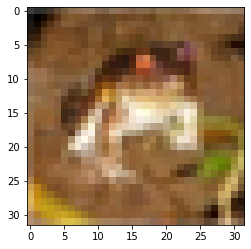

In [ ]:
#@title Visualise data


plt.imshow(x_train[0])
label_names[y_train[0][0]]

In [ ]:
#@title Normalise data

x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

In [ ]:
#@title Define plotting function for classification metrics

def plot_curve(epochs, hist, metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for metric in metrics:
    x = hist[metric]
    plt.plot(epochs[1:], x[1:], label=metric)
  
  plt.legend()

print("plot_curve defined")

plot_curve defined


In [ ]:
#@title Define function for creating a model

def create_model(learning_rate):
  model = tf.keras.models.Sequential()

  #Flatten image array to 1D
  model.add(tf.keras.layers.Flatten(input_shape=(len(x_train[0]), len(x_train[0][0]), len(x_train[0][0][0]))))
  print('First layer contains', len(x_train[0]) * len(x_train[0][0]) * len(x_train[0][0][0]), 'nodes')

  model.add(tf.keras.layers.Dense(units=500, activation='relu'))

  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(units=200, activation='relu'))

  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(units=100, activation='relu'))

  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.Dense(units=50, activation='relu'))

  #Ouput layer
  model.add(tf.keras.layers.Dense(units=len(label_names), activation='softmax'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model

In [ ]:
#@title Define function for training a model

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.2):
  history = model.fit(x=train_features, y=train_label, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=validation_split)

  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

First layer contains 3072 nodes
Epoch 1/100
8/8 [==============================] - 2s 213ms/step - loss: 2.2670 - accuracy: 0.1436 - val_loss: 2.2716 - val_accuracy: 0.1482
Epoch 2/100
8/8 [==============================] - 1s 171ms/step - loss: 2.1573 - accuracy: 0.2077 - val_loss: 2.0057 - val_accuracy: 0.2594
Epoch 3/100
8/8 [==============================] - 2s 194ms/step - loss: 1.9691 - accuracy: 0.2749 - val_loss: 1.8624 - val_accuracy: 0.3143
Epoch 4/100
8/8 [==============================] - 1s 170ms/step - loss: 1.8399 - accuracy: 0.3181 - val_loss: 1.7630 - val_accuracy: 0.3493
Epoch 5/100
8/8 [==============================] - 1s 171ms/step - loss: 1.7613 - accuracy: 0.3487 - val_loss: 1.6875 - val_accuracy: 0.3817
Epoch 6/100
8/8 [==============================] - 2s 207ms/step - loss: 1.6738 - accuracy: 0.3832 - val_loss: 1.5911 - val_accuracy: 0.4083
Epoch 7/100
8/8 [==============================] - 2s 208ms/step - loss: 1.6106 - accuracy: 0.4064 - val_loss: 1.5635 - va

[0.839504599571228, 0.7152000069618225]

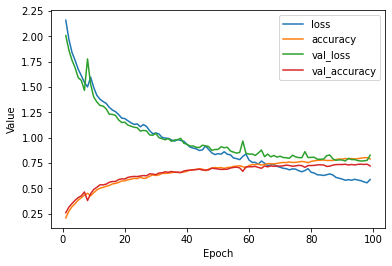

In [ ]:
#@title Train model

learning_rate = 0.002
epochs = 100
batch_size = 5000
validation_split = 0.2

#model = create_model(learning_rate)
model = create_convolutional_model(learning_rate)

start_time = time.time()
epochs, hist = train_model(model, x_train_normalized, y_train, epochs, batch_size, validation_split)
print('Time to train model:', time.time() - start_time)

metrics=['loss', 'accuracy', 'val_loss', 'val_accuracy']
plot_curve(epochs, hist, metrics)

model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

| Structure | Learning rate | Batch size | Epochs | Validation split | Validation loss | Validation accuracy | Test loss | Test accuracy | Training Time | Comments |
|-----------|---------------|------------|--------|------------------|---------------|-------------------|-----------|---------------|---------------|----------|
| Dense(500), Dropout(0.5), Dense(200) | 0.001 | 1000 | 20 | 0.2 | 1.6159 | 0.4355 | 1.5922 | 0.4455 | 143 |
| Dense(500), Dropout(0.5), Dense(200) | 0.01  | 500  | 20 | 0.2 | 2.1169 | 0.1664 | 2.1124 | 0.1636 | 154 |
| Dense(500), Dropout(0.5), Dense(200) | 0.001  | 5000  | 20 | 0.2 | 1.6821 | 0.4066 | 1.6544 | 0.4117 | 143 |
| Dense(500), Dropout(0.5), Dense(200) | 0.001  | 500  | 20 | 0.2 | 1.6510 | 0.4280 | 1.6316 | 0.4379 | 202 |
| Dense(300), Dropout(0.5), Dense(200) | 0.001 | 1000 | 20 | 0.2 | 1.6397 | 0.4279 | 1.6173 | 0.4343 | 143 |
| Dense(300), Dropout(0.5), Dense(100) | 0.001 | 1000 | 20 | 0.2 | 1.6077 | 0.4313 | 1.5863 | 0.4353 | 94 |
| Dense(100), Dropout(0.5), Dense(50) | 0.001 | 1000 | 20 | 0.2 | 1.9132 | 0.3341 | 1.9008 | 0.3323 | 83 |
| Dense(100), Dropout(0.5), Dense(50) | 0.001 | 1000 | 50 | 0.2 | 1.9421 | 0.3155 | 1.9322 | 0.3218 | 143 |
| Dense(100), Dropout(0.5), Dense(50), Dropout(0.3) | 0.001 | 1000 | 20 | 0.2 | 1.9637 | 0.3011 | 1.9567 | 0.3041 | 83 |
| Dense(500), Dropout(0.5), Dense(200), Dropout(0.3) | 0.001 | 1000 | 20 | 0.2 | 1.7098 | 0.4127 | 1.6919 | 0.4227 |
| Dense(500), Dropout(0.7), Dense(200) | 0.001 | 1000 | 20 | 0.2 | 1.9395 | 0.3207 | 1.9271 | 0.3327 | 143 |
| Dense(500), Dropout(0.2), Dense(200) | 0.001 | 1000 | 20 | 0.2 | 1.4591 | 0.4828 | 1.4328 | 0.4889 | 135 |
| Dense(500), Dropout(0.2), Dense(200), Dense(200) | 0.001 | 1000 | 20 | 0.2 | 1.4653 | 0.4775 | 1.4257 | 0.4897 | 143 |
| Dense(500), Dropout(0.2), Dense(200), Dense(100) | 0.001 | 1000 | 20 | 0.2 | 1.4549 | 0.4886 | 1.4255 | 0.4986 | 143 |
| Dense(500), Dropout(0.2), Dense(200), Dropout(0.1) Dense(100) | 0.001 | 1000 | 20 | 0.2 | 1.4572 | 0.4873 | 1.4268 | 0.4964 | 203 |
| Dense(500), Dense(200), Dense(100) | 0.001 | 1000 | 20 | 0.2 | 1.4462 | 0.4955 | 1.4200 | 0.4985 | 143 |
| Dense(500), Dense(200), Dense(100), Dense(50) | 0.001 | 1000 | 20 | 0.2 | 1.4654 | 0.4819 | 1.4353 | 0.4923 |
| Dense(500), Dense(200), Dense(100), Dense(50) | 0.001 | 1000 | 50 | 0.2 | 1.4533 | 0.5169 | 1.4506 | 0.5166 |
| Dense(500), Dense(200), Dense(100), Dense(50) | 0.001 | 1000 | 100 | 0.2 | 2.0430 | 0.5047 | 2.0269 | 0.5100 | 668 | Massive overfitting (traninig acc. 83%)|
| Dense(500), Dropout(0.5), Dense(200), Dropout(0.5), Dense(100), Dropout(0.5), Dense(50) | 0.001 | 1000 | 100 | 0.2 | 1.8931 | 0.3168 | 1.8796 | 0.3247 | | Way too much regularisation |
| Dense(500), Dropout(0.1), Dense(200), Dropout(0.1), Dense(100), Dropout(0.1), Dense(50) | 0.001 | 1000 | 100 | 0.2 | 1.4206 | 0.5299 | 1.4032 | 0.5378 | 743 | Still a bit of overfitting (training acc. 68%) |
| Dense(500), Dropout(0.2), Dense(200), Dropout(0.2), Dense(100), Dropout(0.2), Dense(50) | 0.001 | 1000 | 100 | 0.2 | 1.3798 | 0.5190 | 1.3576 | 0.5210 | 744 | Less overfitting, perhaps a bit (training acc. 57%) |
| Dense(500), Dropout(0.2), Dense(200), Dropout(0.2), Dense(100), Dropout(0.2), Dense(50) | 0.001 | 1000 | 300 | 0.2 | 1.4578 | 0.5177 | 1.4563 | 0.5224 | 2123 | More overfitting (training acc. 65%).  More epochs hasn't helped much |
| Conv(16, 3), MP(2), Conv(32, 3), MP(2), Conv(64, 3), MP(2), Flatten, Dense(512) | 0.001 | 1000 | 20 | 0.2 | 1.1048 | 0.6200 | 1.1056 | 0.6125 | 624 | First attempt at convolutional network.  Doesn't look like it has converged |
| Conv(16, 3), MP(2), Conv(32, 3), MP(2), Conv(64, 3), MP(2), Flatten, Dense(512) | 0.001 | 1000 | 50 | 0.2 | 1.0049 | 0.6623 | 1.0013 | 0.6610 | 1457 | Closer to converging, although could probably go farther.  slight overfitting (Test acc. 75%) |
| Conv(16, 3), MP(2), Conv(32, 3), MP(2), Conv(64, 3), MP(2), Flatten, Dense(512), Dropout(0.5) | 0.001 | 1000 | 50 | 0.2 | 0.9329 | 0.6780 | 0.9345 | 0.6812 | 1523 | Dropout has decreased overfitting, still not converging |
|Added dropout layers between convolutional layers.  Much less overfitting but not converged after 50 epochs.  Accuracy: 68% |
| Only Dropout last (biggest) convolutional layer.  Increased acurracy to 73%, although quite a lot of overfitting. |
| Increasing Dropout (0.2 -> 0.4) reduced overfitting but acc still 73%.  Looks like it hasn't converged yet though |
| Increasing epochs to 100, and tweaking some hyperparms has yields an accuracy of 73.68%, takes 1h30m to train this model. |
| Switching to GPU reduces runtime to 3m30s.  Final accuracy was 75% in this case |


Best test accuracy - 53.8% 
Not bad for simple network without convolutions.  
Lin, Memisevic and Konda manage to get 70% using 'linear bottleneck layers and unsuperpervised pre-training using autoencoders without hidden unit biases'.
They also manage to achieve 78% accuracy by 'adding deformations to the training data'.






In [ ]:
metrics=['loss', 'accuracy', 'val_loss', 'val_accuracy']
#plot_curve(epochs, hist, metrics)
epochs

100

In [ ]:
#@title Define method for creating a convolutional model

def create_convolutional_model(learning_rate):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(x_train[0]), len(x_train[0][0]), len(x_train[0][0][0]))),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.4),

    #Create one dimension tensor so we can add fully connected layers after
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),

    #Ouput layer
    tf.keras.layers.Dense(units=len(label_names), activation='softmax')
  ])

  print('First layer contains', len(x_train[0]) * len(x_train[0][0]) * len(x_train[0][0][0]), 'nodes')

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model

In [ ]:
#@title Define method for creating a convolutional model

def create_convolutional_model_functional(learning_rate):
  x = tf.keras.layers.Input(shape=(len(x_train[0]), len(x_train[0][0]), len(x_train[0][0][0])))

  x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)

  x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)

  x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2)(x)
  x = tf.keras.layers.Dropout(0.4)(x)

  #Create one dimension tensor so we can add fully connected layers after
  x = tf.keras.layers.Flatten()(x),
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)

  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.1)(x)

    #Ouput layer
  x = tf.keras.layers.Dense(units=len(label_names), activation='softmax')(x)


  print('First layer contains', len(x_train[0]) * len(x_train[0][0]) * len(x_train[0][0][0]), 'nodes')

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model